<a href="https://colab.research.google.com/github/whiteevl/machine-learning/blob/main/First_Project_Creating_an_NLP_Model_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
nama = "Aradea Bayu Murti"
email = "whiteevilfero@gmail.com"
no_hp = "62857****47643"
id_dicoding = "priceofdarkness"
link_dataset = "https://www.kaggle.com/datasets/lava18/google-play-store-apps"

print(f'Nama: {nama}')
print(f'Email: {email}')
print(f'No. HP: {no_hp}')
print(f'ID Dicoding: {id_dicoding}')
print(f'Dataset: {link_dataset}')

Nama: Aradea Bayu Murti
Email: whiteevilfero@gmail.com
No. HP: 62857****47643
ID Dicoding: priceofdarkness
Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
import nltk
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
google_play_data = pd.read_csv('googleplaystore.csv', sep=',')

google_play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
google_play_data.shape

(10841, 13)

In [ ]:
google_play_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
print(google_play_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [ ]:
google_play_data.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
google_play_data = google_play_data.drop(columns=['Rating'])
google_play_data

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
google_play_data.Genres.count()

10841

In [ ]:
google_play_data['text'] = google_play_data['Genres'] + " " + google_play_data['Category']
google_play_data

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,text
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design;Pretend Play ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design;Creativity ART_AND_DESIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Education FAMILY
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Education FAMILY
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Medical MEDICAL
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Books & Reference BOOKS_AND_REFERENCE


In [ ]:
stwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stwd.update(punctuation)

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stwd:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text

google_play_data['text']=google_play_data['text'].apply(denoise_text)

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(google_play_data.text)
corpus[:10]

['Art',
 'Design',
 'ART_AND_DESIGN',
 'Art',
 'Design;Pretend',
 'Play',
 'ART_AND_DESIGN',
 'Art',
 'Design',
 'ART_AND_DESIGN']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'FAMILY': 1972,
 'GAME': 1144,
 'TOOLS': 843,
 'Tools': 842,
 'Entertainment': 623,
 'Education': 549,
 'Medical': 463,
 'MEDICAL': 463,
 'Business': 460,
 'BUSINESS': 460}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_words = cv.transform(corpus)
    sum_words = bag_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

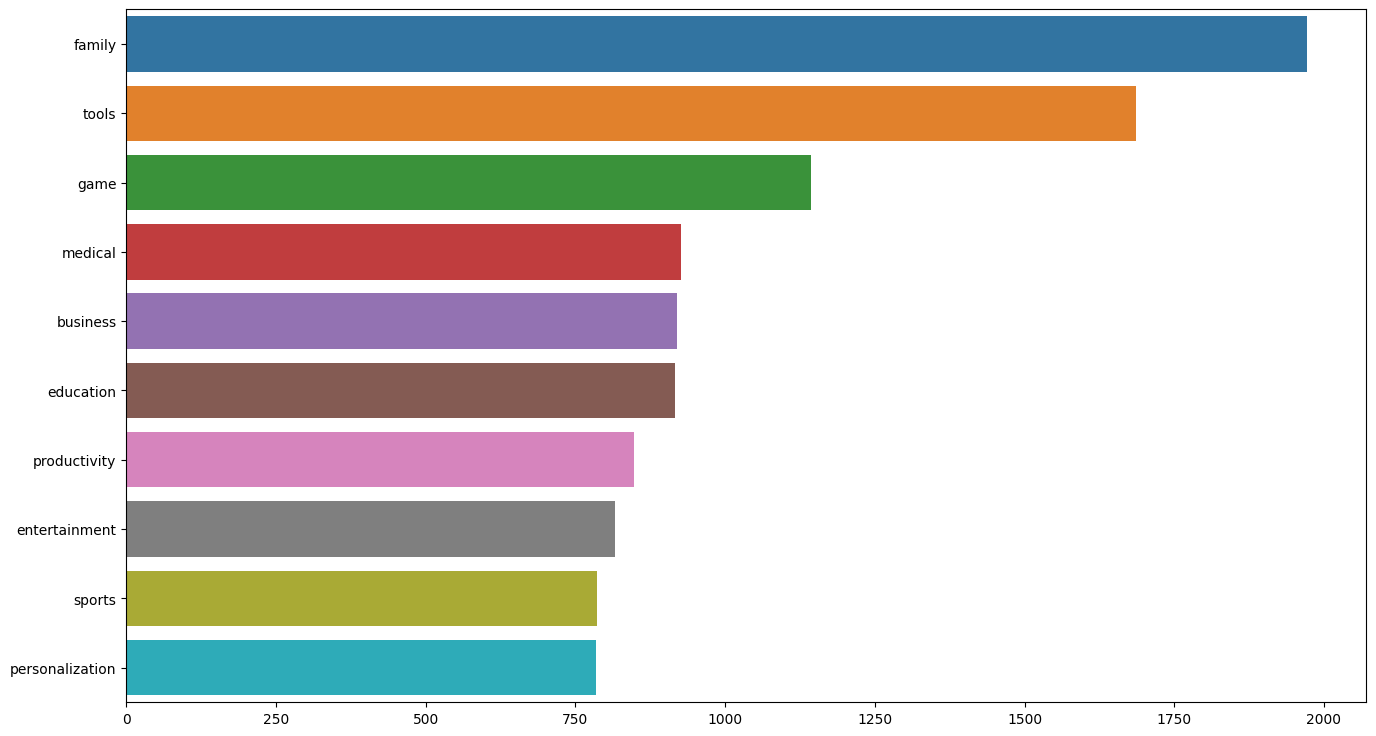

In [ ]:
plt.figure(figsize = (16,9))
most_common = get_top_text_ngrams(google_play_data.text,10,1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))

In [ ]:
Type = pd.get_dummies(google_play_data.Type)
encoded_data = pd.concat([google_play_data, Type], axis=1)
encoded_data = encoded_data.drop(columns='Type')
encoded_data.head(10)

,App,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,text,0,Free,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art Design ART_AND_DESIGN,0,1,0
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art Design;Pretend Play ART_AND_DESIGN,0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art Design ART_AND_DESIGN,0,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art Design ART_AND_DESIGN,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art Design;Creativity ART_AND_DESIGN,0,1,0
5,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art Design ART_AND_DESIGN,0,1,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Art Design ART_AND_DESIGN,0,1,0
7,Infinite Painter,ART_AND_DESIGN,36815,29M,"1,000,000+",0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Art Design ART_AND_DESIGN,0,1,0
8,Garden Coloring Book,ART_AND_DESIGN,13791,33M,"1,000,000+",0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Art Design ART_AND_DESIGN,0,1,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,121,3.1M,"10,000+",0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Art Design;Creativity ART_AND_DESIGN,0,1,0


In [ ]:
text_data = encoded_data['text'].values
encoded_labels = encoded_data[['Free', 'Paid']].values

In [ ]:
text_data

array(['Art Design ART_AND_DESIGN',
       'Art Design;Pretend Play ART_AND_DESIGN',
       'Art Design ART_AND_DESIGN', ..., 'Medical MEDICAL',
       'Books Reference BOOKS_AND_REFERENCE', 'Lifestyle LIFESTYLE'],
      dtype=object)

In [ ]:
encoded_labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(text_data, encoded_labels,test_size = 0.2,shuffle=True)

In [ ]:
max_vocabulary_size = 10000
max_sequence_length = 200
truncation_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=max_vocabulary_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
padded_sequences_train = pad_sequences(sequences_train, maxlen=max_sequence_length, truncating=truncation_type)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating=truncation_type)

print(padded_sequences_test.shape)

(2169, 200)


In [ ]:
padded_sequences_train

array([[ 0,  0,  0, ...,  0,  3,  3],
       [ 0,  0,  0, ...,  0, 37,  2],
       [ 0,  0,  0, ...,  0, 67,  5],
       ...,
       [ 0,  0,  0, ...,  0, 11, 11],
       [ 0,  0,  0, ...,  0, 14, 14],
       [ 0,  0,  0, ...,  0, 56, 56]], dtype=int32)

In [ ]:
padded_sequences_test

array([[ 0,  0,  0, ...,  0, 11, 11],
       [ 0,  0,  0, ...,  0, 14, 14],
       [ 0,  0,  0, ...,  0, 12, 12],
       ...,
       [ 0,  0,  0, ...,  0, 14, 14],
       [ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ..., 42,  4, 43]], dtype=int32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocabulary_size, output_dim=64, input_length=max_sequence_length),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 64)           640000    
                                                                 
 lstm_4 (LSTM)               (None, 128)               98816     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 755586 (2.88 MB)
Trainable params: 755586 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\n akurasi dari training set and the validation set telah terpenuhi > 95%!")
early_stopping_callback = myCallback()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

callbacks = [early_stopping, model_checkpoint]

number_of_epochs = 15
training_history = model.fit(padded_sequences_train, y_train, epochs=number_of_epochs,
                              validation_data=(padded_sequences_test, y_test), verbose=2, callbacks=callbacks)

Epoch 1/15
271/271 - 86s - loss: 0.2517 - accuracy: 0.9282 - val_loss: 0.2612 - val_accuracy: 0.9184 - 86s/epoch - 316ms/step
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


271/271 - 82s - loss: 0.2453 - accuracy: 0.9282 - val_loss: 0.2608 - val_accuracy: 0.9184 - 82s/epoch - 301ms/step
Epoch 3/15
271/271 - 82s - loss: 0.2397 - accuracy: 0.9282 - val_loss: 0.2582 - val_accuracy: 0.9184 - 82s/epoch - 302ms/step
Epoch 4/15
271/271 - 87s - loss: 0.2408 - accuracy: 0.9282 - val_loss: 0.2589 - val_accuracy: 0.9184 - 87s/epoch - 320ms/step
Epoch 5/15
271/271 - 84s - loss: 0.2407 - accuracy: 0.9282 - val_loss: 0.2629 - val_accuracy: 0.9184 - 84s/epoch - 310ms/step
Epoch 6/15
271/271 - 84s - loss: 0.2398 - accuracy: 0.9282 - val_loss: 0.2568 - val_accuracy: 0.9184 - 84s/epoch - 310ms/step
Epoch 7/15
271/271 - 84s - loss: 0.2392 - accuracy: 0.9282 - val_loss: 0.2609 - val_accuracy: 0.9184 - 84s/epoch - 309ms/step
Epoch 8/15
271/271 - 85s - loss: 0.2388 - accuracy: 0.9282 - val_loss: 0.2606 - val_accuracy: 0.9184 - 85s/epoch - 313ms/step
Epoch 9/15
271/271 - 83s - loss: 0.2376 - accuracy: 0.9282 - val_loss: 0.2569 - val_accuracy: 0.9184 - 83s/epoch - 305ms/step


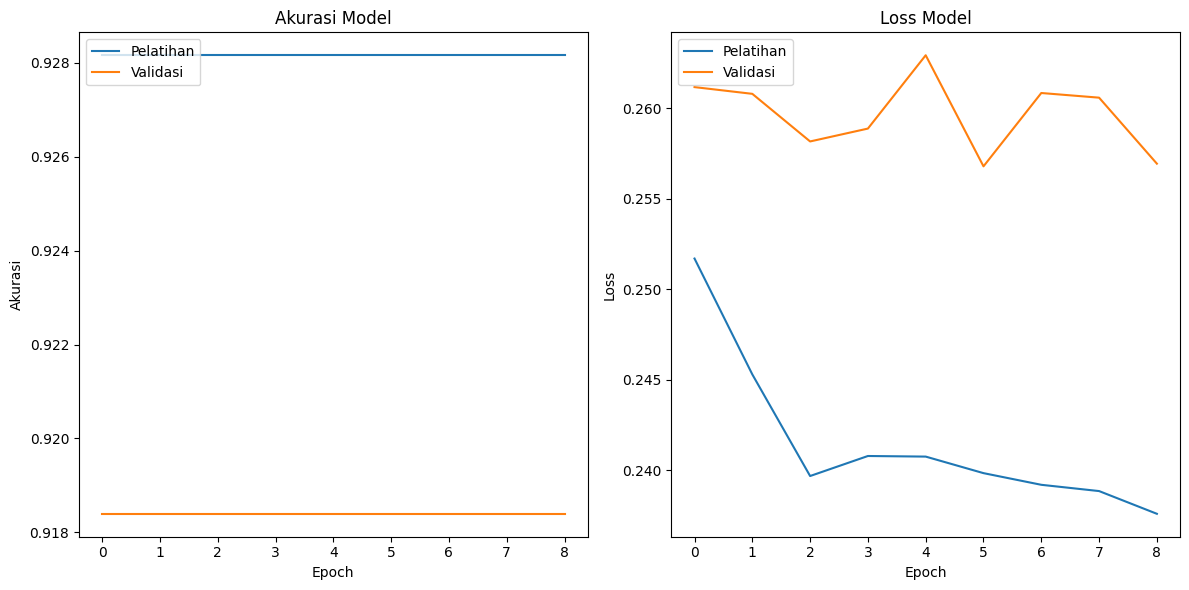

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Pelatihan', 'Validasi'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Pelatihan', 'Validasi'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
train_accuracy = training_history.history['accuracy'][-1]
val_accuracy = training_history.history['val_accuracy'][-1]

if train_accuracy >= 0.91 and val_accuracy >= 0.91:
    print("Model memenuhi syarat akurasi minimal.")
else:
    print("Model tidak memenuhi syarat akurasi minimal.")

Model memenuhi syarat akurasi minimal.
